In [2]:
#Diabetes data predictions using ML pipelines

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [115]:
#Loading the dataset
data = pd.read_csv('C:\\Users\\LENOVO\\Desktop\\Python course\\diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [116]:
data.shape

(768, 9)

In [117]:
#Basic EDA on Diabetes Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [118]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [119]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [120]:
data.describe().T  #creating the trsnspose of the description of the Dataframe and then showing it

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### By carefully looking at the minimum values of the columns Glucose, BloodPressure, SkinThickness, Insulin and BMI. Can those values be zeros? 

### It can be inferred that somthing is wrong with those column. It most likely infer that the miminum values which the table claims to be zeros are missing values

### It is therefore better to replace zeros with nan in those columns

In [121]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [122]:
data[data['BloodPressure']== 0].shape

(35, 9)

In [123]:
data[data['Glucose']== 0].shape

(5, 9)

In [124]:
data[data['SkinThickness']== 0].shape

(227, 9)

In [125]:
data[data['Insulin']== 0].shape

(374, 9)

In [126]:
data[data['BMI']== 0].shape

(11, 9)

In [127]:
#Creating a copy of the dataset
data_copy= data.copy(deep=True)

data_copy[['BloodPressure', 'Glucose', 'SkinThickness', 'Insulin', 'BMI']]=data_copy[['BloodPressure', 'Glucose', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)
data_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [128]:
#Filling the nan values based on the respective peculirities of the variables of the dataset
data_copy['Glucose']= data_copy['Glucose'].fillna(data_copy['Glucose'].mean())
data_copy['BloodPressure']= data_copy['BloodPressure'].fillna(data_copy['BloodPressure'].median())
data_copy['SkinThickness']= data_copy['SkinThickness'].fillna(data_copy['SkinThickness'].median())
data_copy['BMI']= data_copy['BMI'].fillna(data_copy['BMI'].mean())
data_copy.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [129]:
data['BloodPressure'].mode()

0    70
dtype: int64

In [132]:
data_copy['Insulin']= data_copy['Insulin'].fillna(method= 'ffill')
data_copy['Insulin']= data_copy['Insulin'].fillna(method= 'bfill')
data_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [133]:
data_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,94.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,94.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,94.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [134]:
data_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.0000,32.00000,99.00
Insulin,768.0,157.084635,114.159085,14.000,78.75000,130.0000,193.25000,846.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.4000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Plotting Graph of the Dataset After Replacing nan Values

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

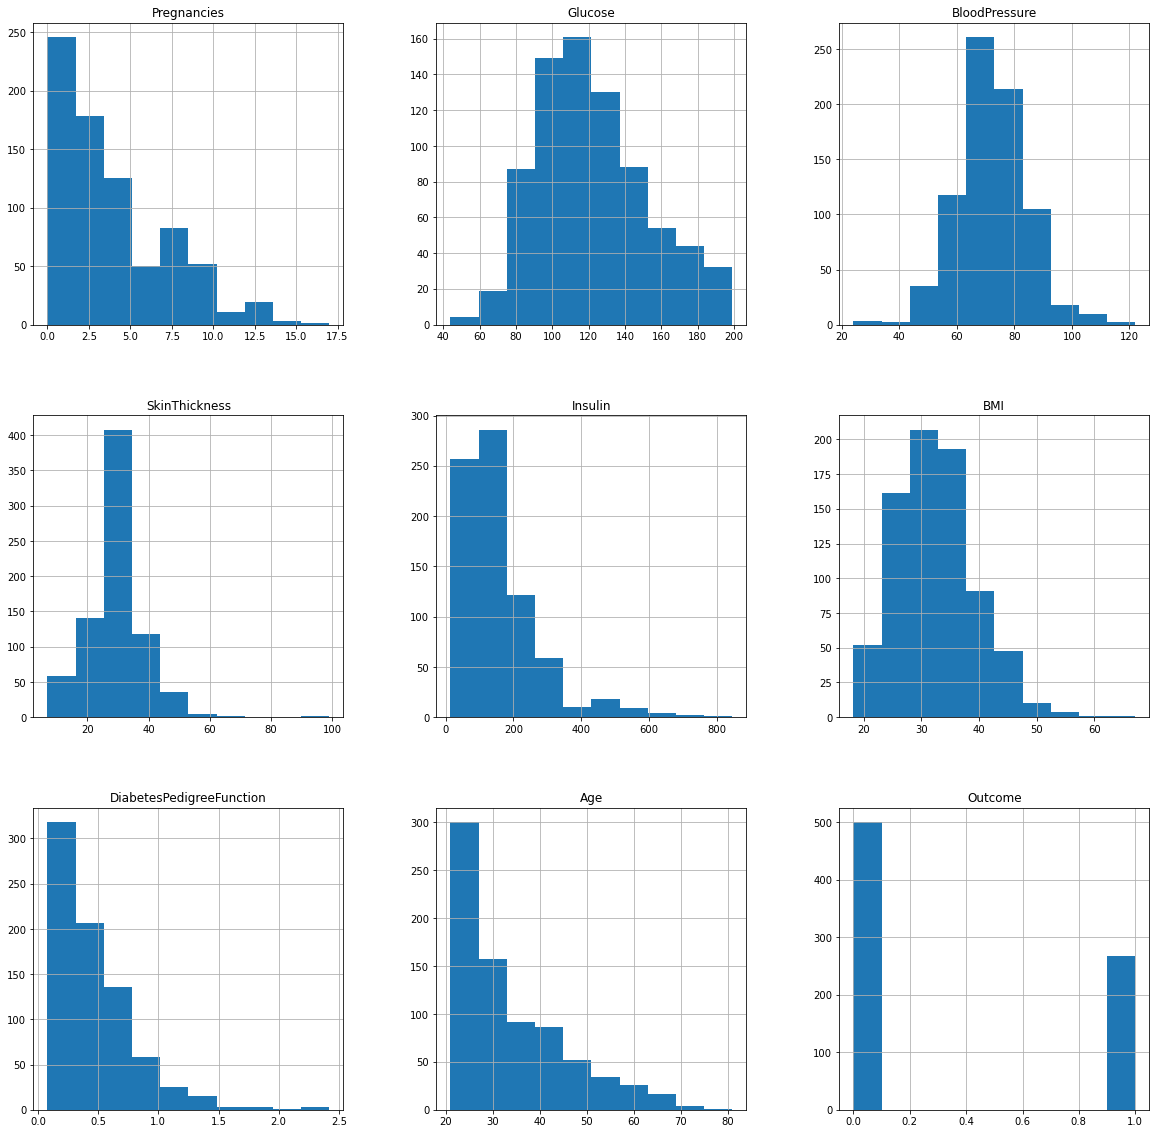

In [135]:
data_copy.hist(figsize=(20,20))

In [136]:
data_copy.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

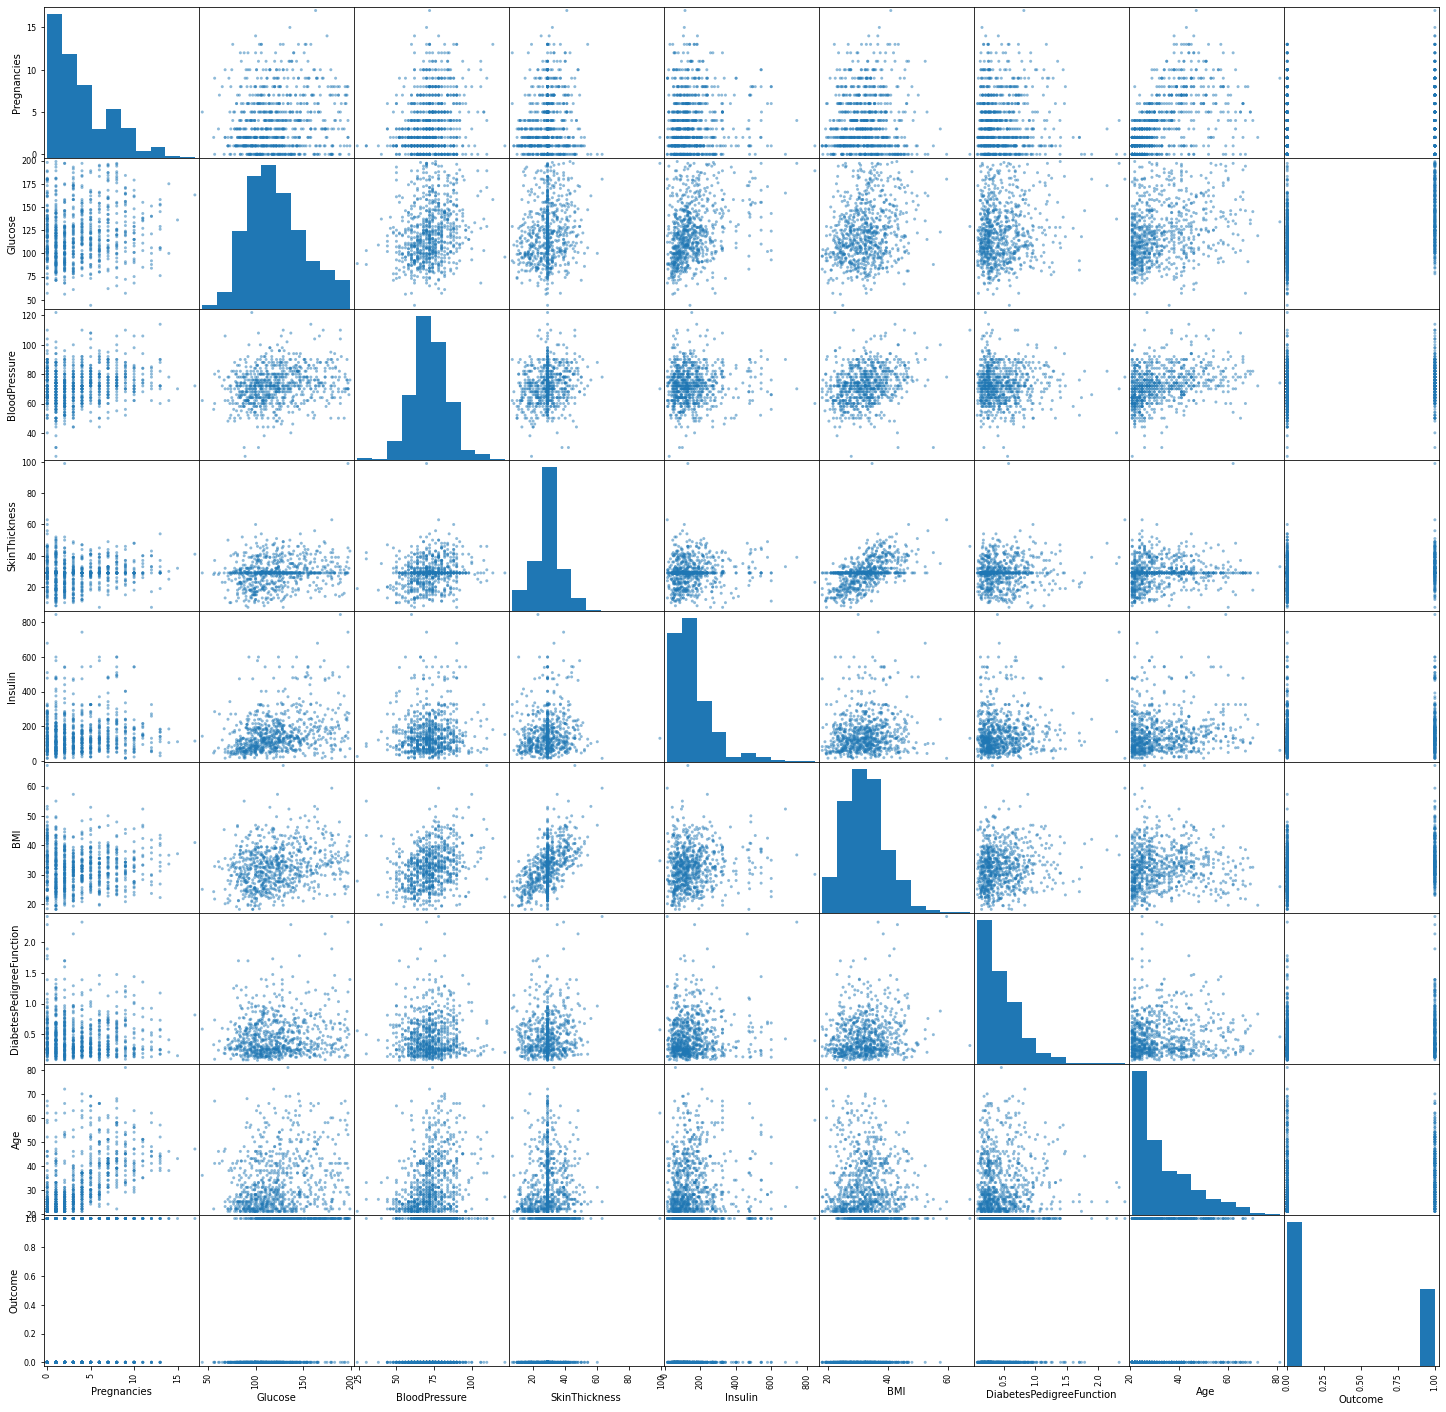

In [137]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(data_copy,figsize=(25, 25))

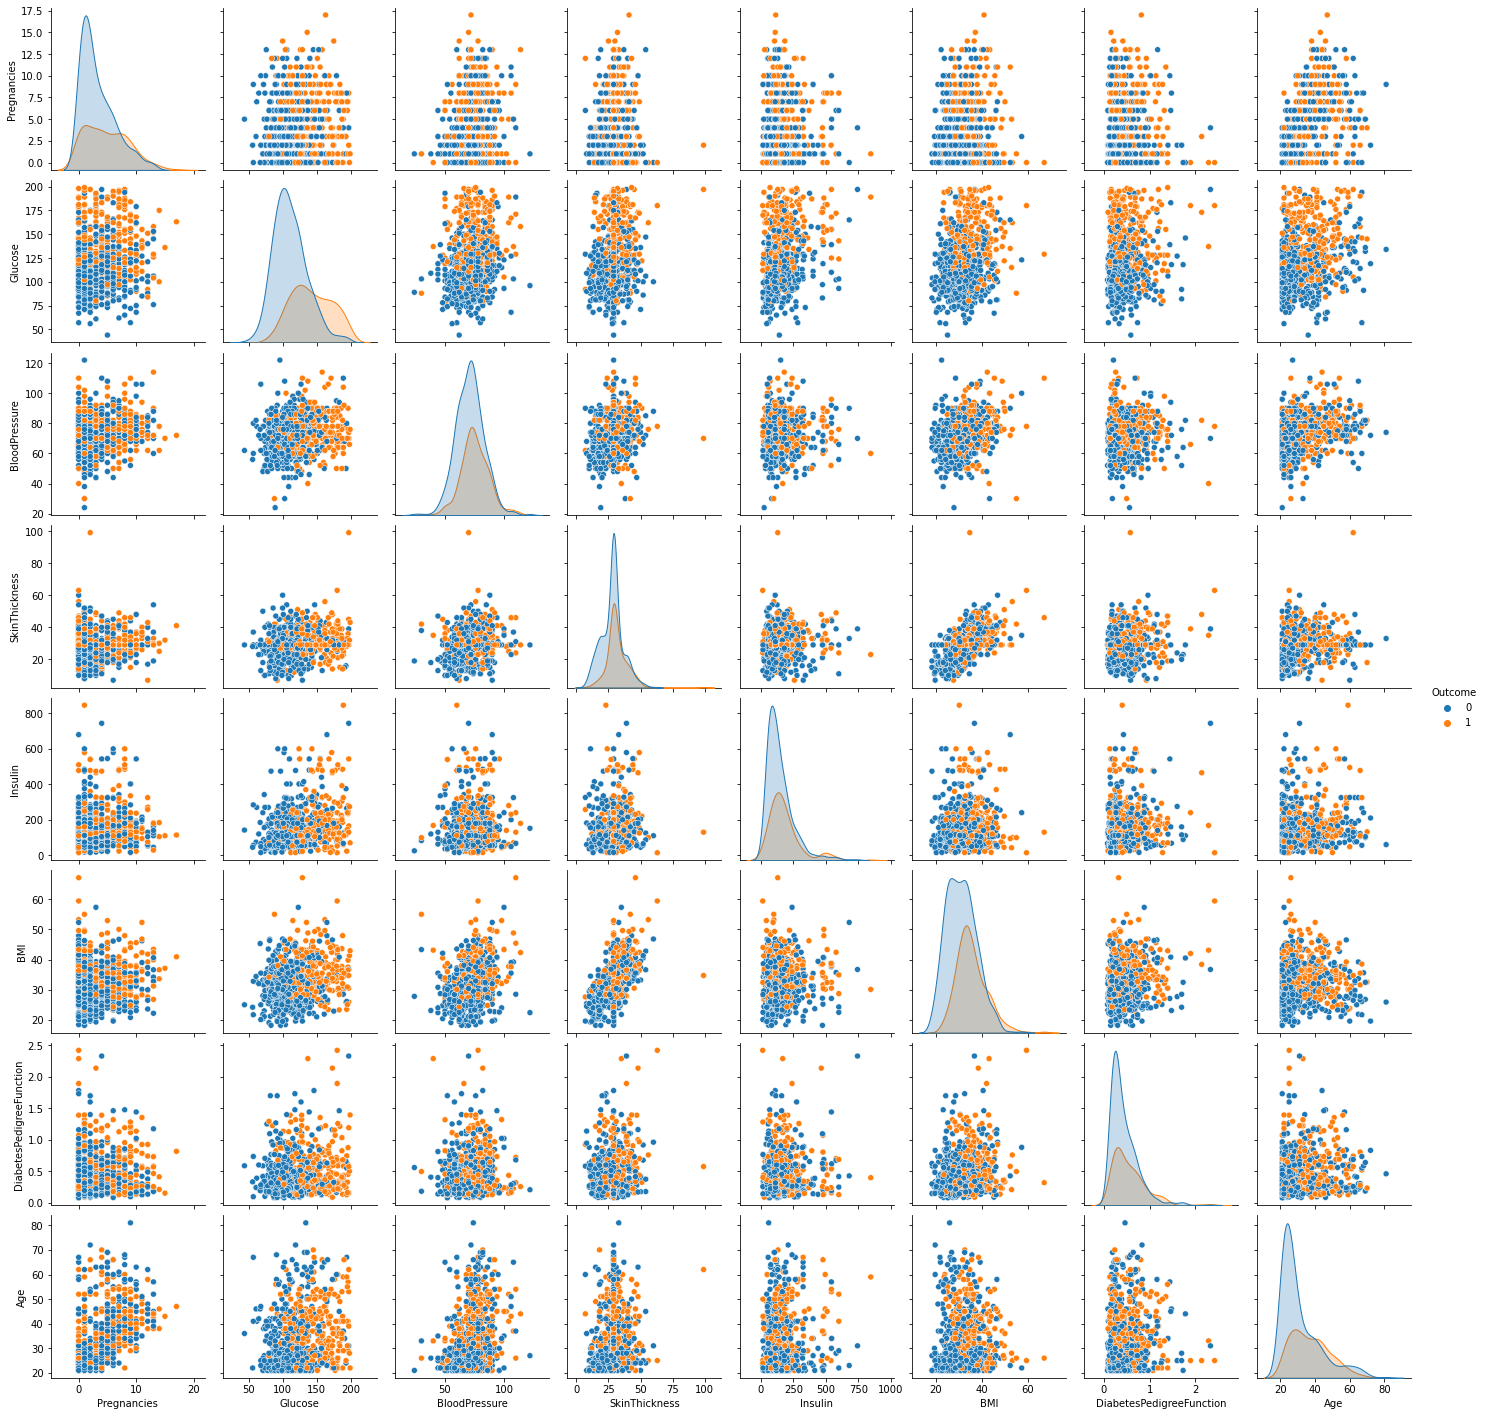

In [138]:
#Pairplot for clean data
p=sns.pairplot(data_copy, hue='Outcome')

In [139]:
data_copy.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208615,0.081770,0.051498,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218557,0.192686,0.316971,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208615,0.218557,1.000000,0.191892,0.061747,0.281319,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192686,0.191892,1.000000,0.095722,0.543162,0.102188,0.126107,0.214873
Insulin,0.051498,0.316971,0.061747,0.095722,1.000000,0.112665,0.084888,0.122539,0.149714
BMI,0.021565,0.230941,0.281319,0.543162,0.112665,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002378,0.102188,0.084888,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324915,0.126107,0.122539,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.165723,0.214873,0.149714,0.311924,0.173844,0.238356,1.000000


### Heatmap of unclean diabetes data

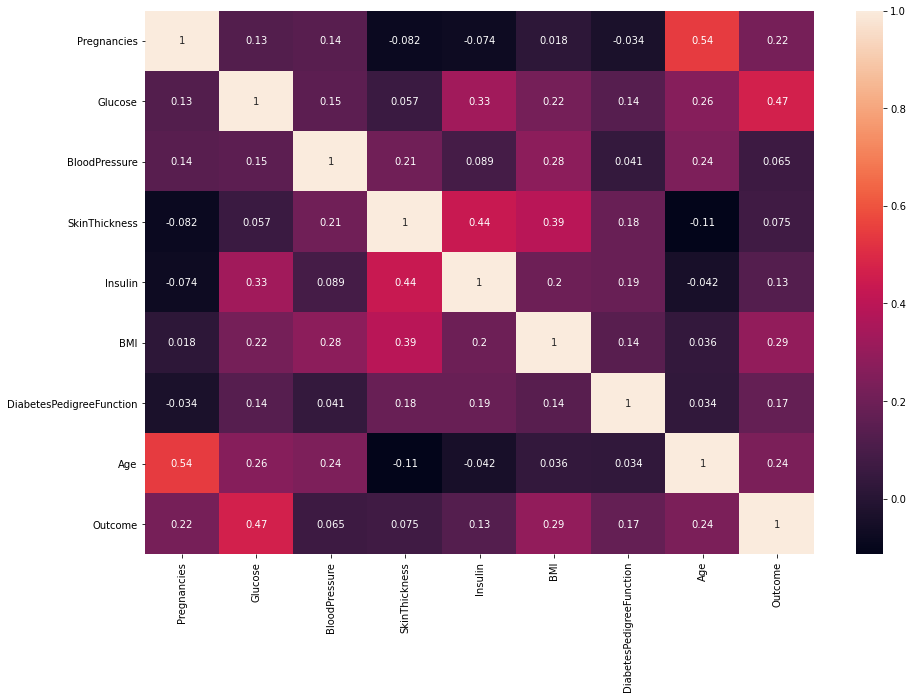

In [140]:
plt.figure(figsize=(15,10))
p=sns.heatmap(data.corr(), annot=True)

### Heatmap of clean data

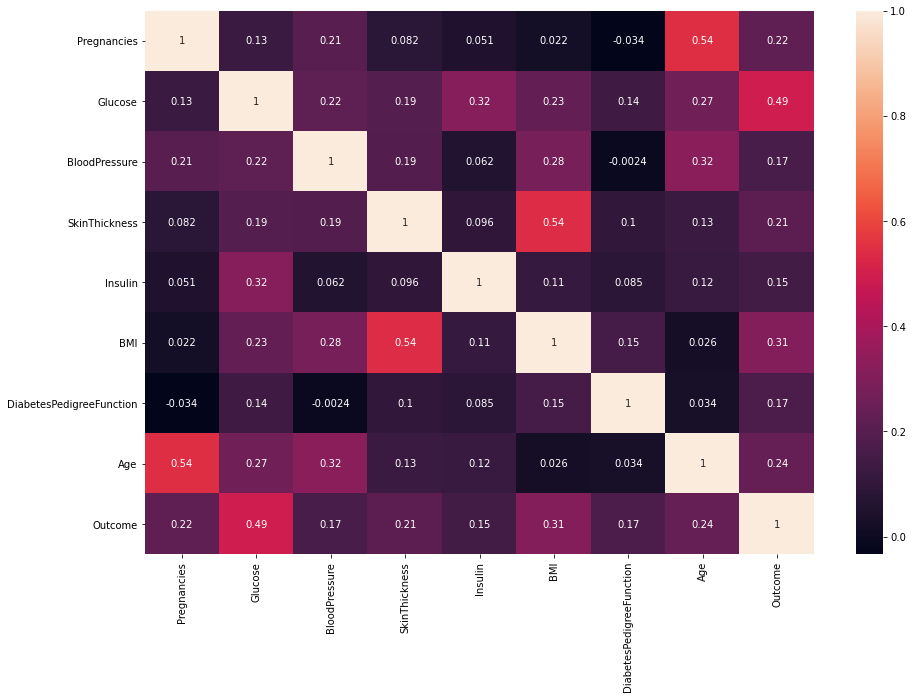

In [141]:
plt.figure(figsize=(15,10))
p=sns.heatmap(data_copy.corr(), annot=True)

### Scaling the diabetes dataset

In [142]:
data_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,94.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,94.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,94.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [144]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X= pd.DataFrame(sc.fit_transform(data_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [145]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.031990,0.670643,-0.552963,0.166292,0.468492,1.425995
1,-0.844885,-1.206162,-0.528319,-0.012301,-0.552963,-0.852531,-0.365061,-0.190672
2,1.233880,2.015813,-0.693761,-0.012301,-0.552963,-1.332833,0.604397,-0.105584
3,-0.844885,-1.074652,-0.528319,-0.695245,-0.552963,-0.634212,-0.920763,-1.041549
4,-1.141852,0.503458,-2.679076,0.670643,0.095678,1.548980,5.484909,-0.020496
